In [3]:
!pip3 install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=80711c9c6ceacdac344953672f81b0d608544fa127bfdbb4d15b40bd1f47b9b8
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=7c4f731b4ae645fc23b4c21419a64e16501b173129f2e72b362b43fc14d1e017
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
import umap.umap_ as umap
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML lab 05/IRIS.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.sepal_length = (data.sepal_length - data.sepal_length.min()) / (data.sepal_length.max() - data.sepal_length.min())

<Axes: >

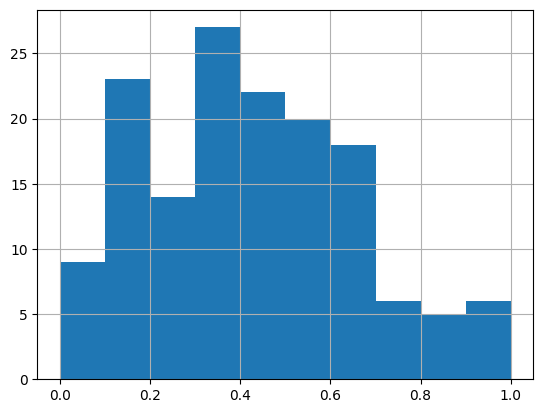

In [11]:
data.sepal_length.hist()

In [6]:
species_dict = {'Iris-setosa' : 1, 'Iris-versicolor' : 2, 'Iris-virginica' : 3}

data.sepal_length=(data.sepal_length-data.sepal_length.mean())/data.sepal_length.std()
data.sepal_width=(data.sepal_width-data.sepal_width.mean())/data.sepal_width.std()
data.petal_length=(data.petal_length-data.petal_length.mean())/data.petal_length.std()
data.petal_width=(data.petal_width-data.petal_width.mean())/data.petal_width.std()

data.species = data.species.apply(lambda x: species_dict[x])

<Axes: >

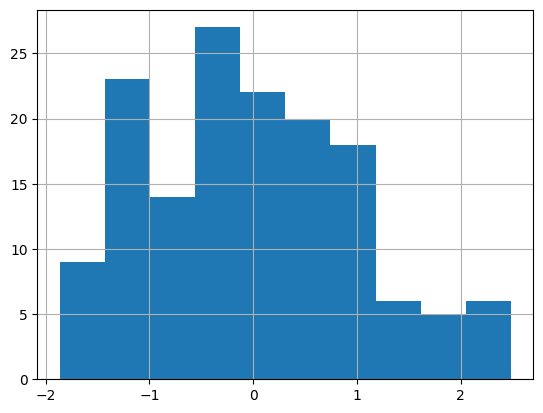

In [7]:
data.sepal_length.hist()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
X = data.drop(columns='species')
y = data.species

mapper = umap.UMAP()
flat_x = mapper.fit_transform(X)

kmeans = KMeans(n_clusters=3).fit_predict(X)

dbscan = DBSCAN(eps=0.9).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


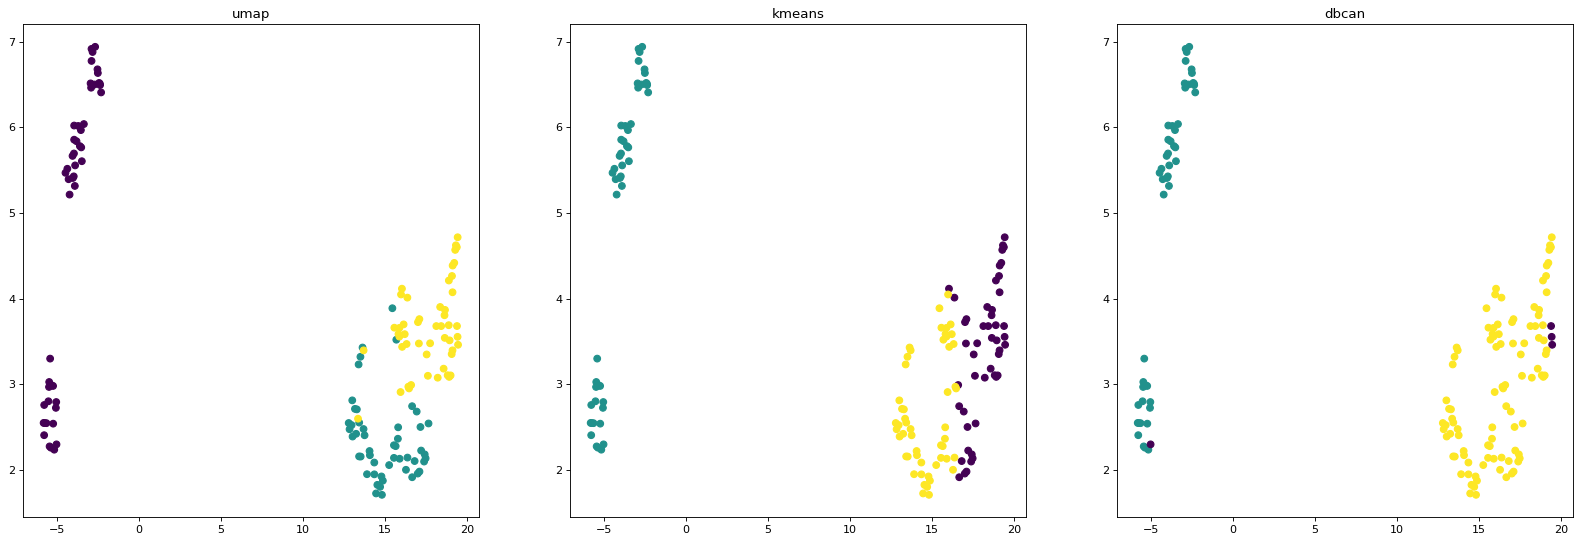

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 8), dpi=80)
ax1.title.set_text('umap')
ax2.title.set_text('kmeans')
ax3.title.set_text('dbcan')

ax1.scatter(flat_x[:, 0], flat_x[:, 1], c=y)
ax2.scatter(flat_x[:, 0], flat_x[:, 1], c=kmeans)
ax3.scatter(flat_x[:, 0], flat_x[:, 1], c=dbscan)

In [ ]:
steps = 33

In [ ]:
kmeans_inner_m, kmeans_outer_m = [0 for _ in range(steps)], [0 for _ in range(steps)]
for step in range(steps):
    labels = KMeans(step + 2, n_init = 'auto').fit_predict(X)
    clusters = len(set(labels))
    if clusters < 2 or clusters > 35:
      continue
    kmeans_inner_m[clusters - 2] = max(kmeans_inner_m[clusters - 2], metrics.silhouette_score(X, labels))
    kmeans_outer_m[clusters - 2] = max(kmeans_outer_m[clusters - 2], metrics.adjusted_rand_score(y, labels))

In [ ]:
dbscan_inner_m, dbscan_outer_m = [0 for _ in range(steps)], [0 for _ in range(steps)]

for step in range(2, steps):
    labels = DBSCAN(eps = 0.1 * step, min_samples = 3).fit_predict(X)
    clusters = len(set(labels))
    if clusters < 2 or clusters > 35:
      continue
    pure_labels = [i for i in labels if i != -1]
    pure_x = [X.iloc[i] for i in range(len(labels)) if labels[i] != -1]
    pure_y = [y.iloc[i] for i in range(len(labels)) if labels[i] != -1]

    dbscan_inner_m[clusters - 2] = max(dbscan_inner_m[clusters - 2], metrics.silhouette_score(pure_x, pure_labels))
    dbscan_outer_m[clusters - 2] = max(dbscan_outer_m[clusters - 2], metrics.adjusted_rand_score(pure_y, pure_labels))

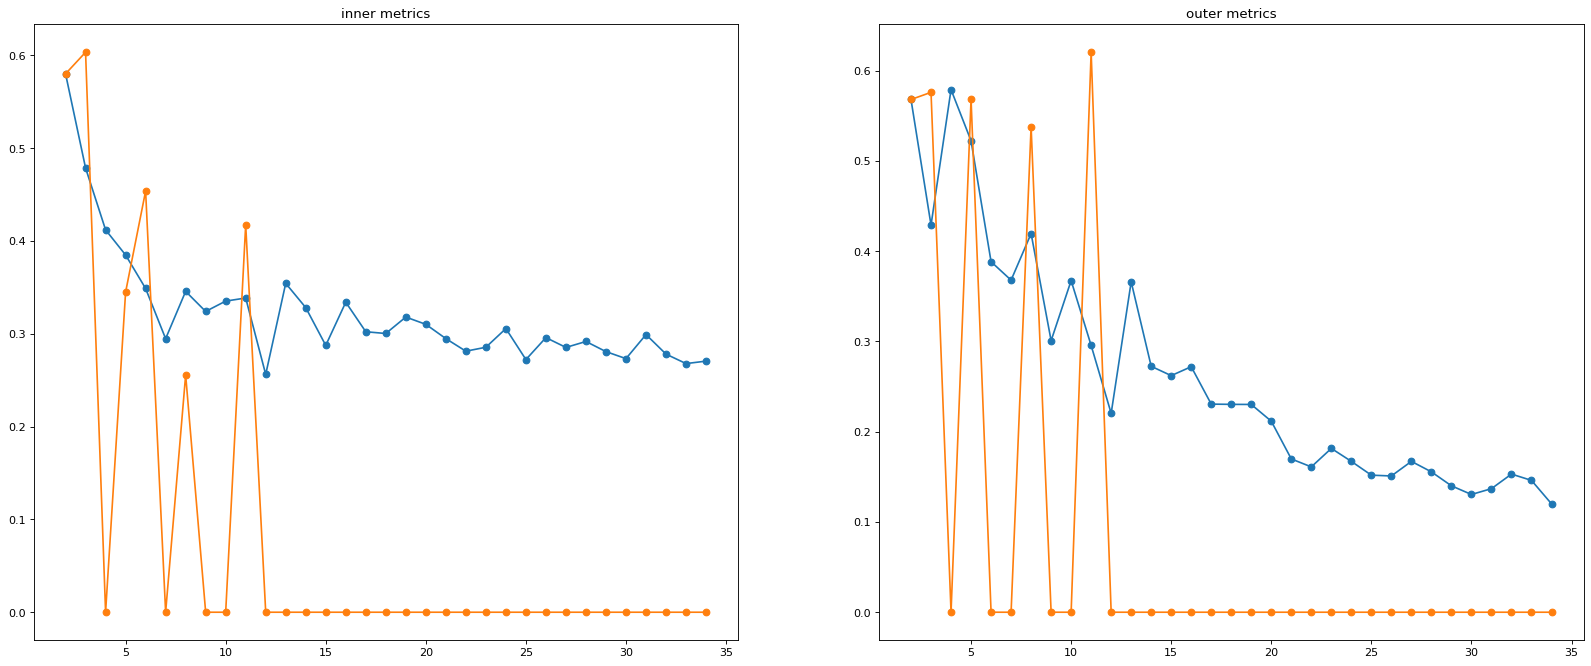

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10), dpi=80)
ax1.title.set_text('inner metrics')
ax2.title.set_text('outer metrics')

ax1.plot(range(2, 35), kmeans_inner_m, range(2, 35), dbscan_inner_m, marker='o')
ax2.plot(range(2, 35), kmeans_outer_m, range(2, 35), dbscan_outer_m, marker='o')

#kmeans is blue

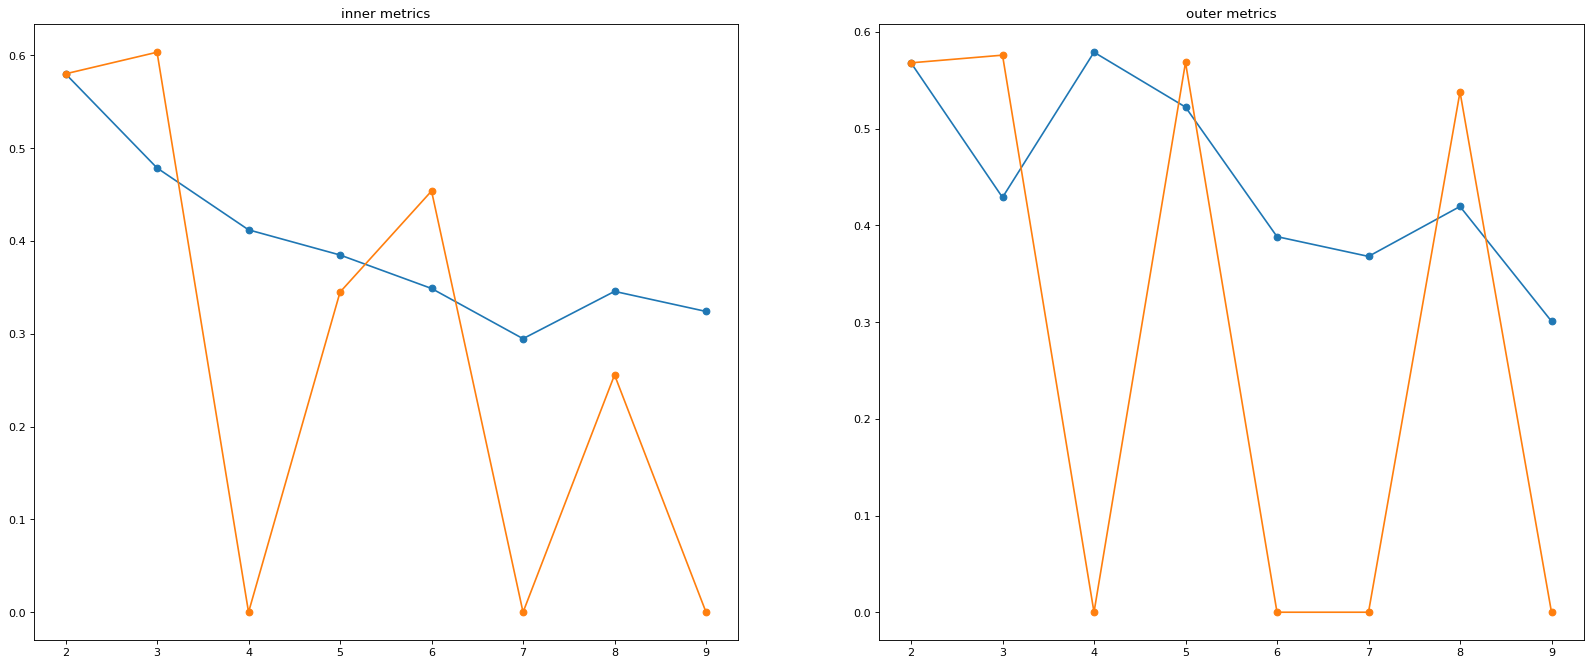

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10), dpi=80)
ax1.title.set_text('inner metrics')
ax2.title.set_text('outer metrics')

ax1.plot(range(2, 10), kmeans_inner_m[:8], range(2, 10), dbscan_inner_m[:8], marker='o')
ax2.plot(range(2, 10), kmeans_outer_m[:8], range(2, 10), dbscan_outer_m[:8], marker='o')